# Multithreading	in Python

1 Multithreading is used to perform multiple tasks simultaneously
2. by code you will write is single threaded --> one task at a time


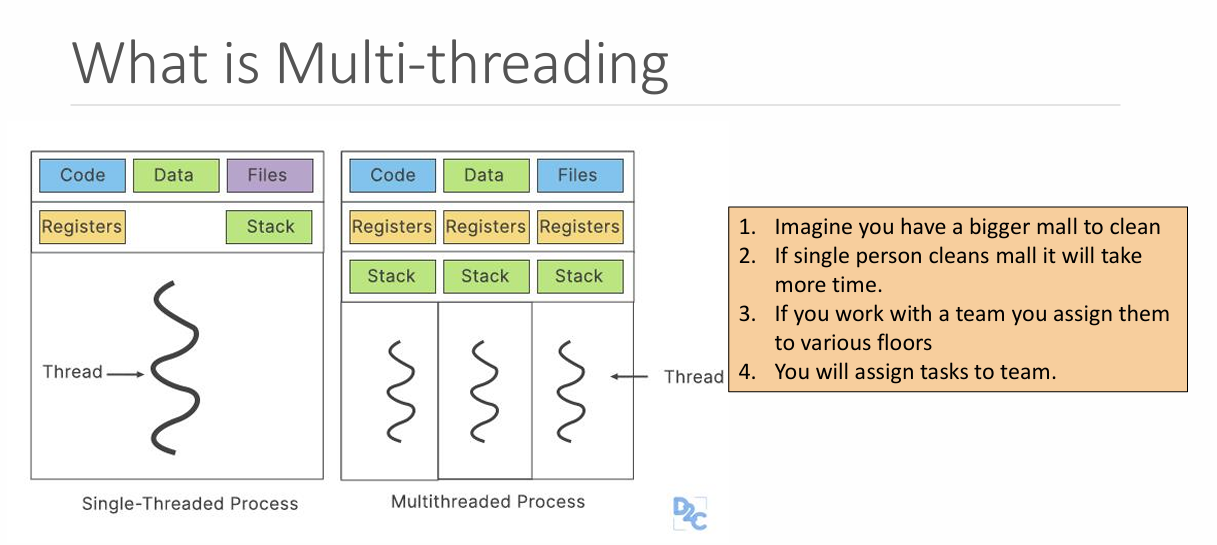

In [15]:
import time

In [16]:
print("Hello!")
time.sleep(2)
print("World")
time.sleep(3)
print("Test")

Hello!
World
Test


In [17]:
import math


def hypotenuse(a, b):
    print("Hypotenuse function started")
    time.sleep(3)
    c = math.sqrt(a**2 + b**2)
    print(f"Hypotenuse of {a} and {b} is {c:.4f}")
    return c

In [18]:
%%time
hypotenuse(3, 4)

Hypotenuse function started
Hypotenuse of 3 and 4 is 5.0000
CPU times: total: 0 ns
Wall time: 3 s


5.0

In [19]:
%%time
hypotenuse(12, 13)

Hypotenuse function started
Hypotenuse of 12 and 13 is 17.6918
CPU times: total: 0 ns
Wall time: 3 s


17.69180601295413

In [20]:
def simple_interest(p, n, r):
    print("Simple Interest function started")
    time.sleep(2)
    i = (p * n * r) / 100
    a = p + i
    print(f"Simple Interest : {i:2f}INR")
    print(f"Amount : {a:2f}INR")

In [23]:
%%time
simple_interest(p=50_000, n=5, r=6.5)

Simple Interest function started
Simple Interest : 16250.000000INR
Amount : 66250.000000INR
CPU times: total: 0 ns
Wall time: 2 s


## Normal Single Threaded execution

In [25]:
%%time
hypotenuse(a=12, b=13)
simple_interest(p=10_000, n=15, r=71) #2 sec

Hypotenuse function started
Hypotenuse of 12 and 13 is 17.6918
Simple Interest function started
Simple Interest : 106500.000000INR
Amount : 116500.000000INR
CPU times: total: 0 ns
Wall time: 5 s


## using multithreading to execute 2 function simultaneously

In [28]:
from threading import Thread

In [29]:
%%time

# Create all the Threads
th1 = Thread(target=hypotenuse, args={12, 13})
th2 = Thread(target=simple_interest, args=(12_000, 3, 6.5))

# start all threads
th1.start()
th2.start()

#Wait for all threads to finish
th1.join()
th2.join()

Hypotenuse function started
Simple Interest function started
Simple Interest : 2340.000000INR
Amount : 14340.000000INR
Hypotenuse of 12 and 13 is 17.6918
CPU times: total: 15.6 ms
Wall time: 3 s


### Multithreading on single function but multiple values

In [30]:
def square(n):
    time.sleep(1)
    print(f"square of number {n} is {n**2}")

In [31]:
%%time
square(23)

square of number 23 is 529
CPU times: total: 0 ns
Wall time: 1 s


In [32]:
def square_list(nums: list[int | float]):
    for i in nums:
        square(i)

In [35]:
a = [12, 13, 14, 16, 18, 20, 23, 112]
type(a)

list

In [36]:
len(a)

8

In [38]:
%%time
square_list(a)

square of number 12 is 144
square of number 13 is 169
square of number 14 is 196
square of number 16 is 256
square of number 18 is 324
square of number 20 is 400
square of number 23 is 529
square of number 112 is 12544
CPU times: total: 0 ns
Wall time: 8.01 s


In [51]:
def square_multi(nums: list[int | float]):
    # Create and append all thread
    threads = []
    # Apply for loop on values
    for i in nums:
        th = Thread(target=square, args=(i,))
        th.start()
        threads.append(th)

    # wait for all threads to finish
    for th in threads:
        th.join()

In [52]:
a

[12, 13, 14, 16, 18, 20, 23, 112]

In [54]:
%%time
square_multi(a)

square of number 12 is 144
square of number 16 is 256
square of number 18 is 324
square of number 13 is 169
square of number 20 is 400
square of number 14 is 196
square of number 23 is 529
square of number 112 is 12544
CPU times: total: 0 ns
Wall time: 1 s


In [55]:
b = list(range(1, 101))
print(b)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [57]:
%%time
square_multi(b)

square of number 1 is 1square of number 2 is 4
square of number 3 is 9
square of number 35 is 1225
square of number 4 is 16
square of number 8 is 64
square of number 9 is 81
square of number 6 is 36
square of number 7 is 49
square of number 12 is 144
square of number 13 is 169
square of number 10 is 100
square of number 11 is 121
square of number 14 is 196
square of number 15 is 225
square of number 19 is 361
square of number 36 is 1296
square of number 20 is 400
square of number 17 is 289
square of number 16 is 256
square of number 22 is 484
square of number 21 is 441
square of number 23 is 529
square of number 38 is 1444
square of number 39 is 1521
square of number 26 is 676
square of number 27 is 729
square of number 25 is 625
square of number 29 is 841
square of number 33 is 1089
square of number 32 is 1024
square of number 30 is 900
square of number 31 is 961
square of number 5 is 25
square of number 34 is 1156
square of number 18 is 324
square of number 44 is 1936
square of numbe

### Implementing multithreading on file download

In [58]:
from urllib.request import urlretrieve


def download_single_file(url: str):
    filename = url.split("/")[-1]
    print(f"Downloading {filename}....")
    urlretrieve(url, filename)
    print(f"{filename} Download Successfully")

In [59]:
url1 = "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv


In [60]:
%%time
download_single_file(url1)

data.csv Download Successfully
CPU times: total: 78.1 ms
Wall time: 2.12 s


### Download multiple files Single thread

In [61]:
urls = [
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv",
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv",
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv",
]

In [62]:
print(urls)

['https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv', 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv', 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv']


In [63]:
def download_single_threaded(url: list[str]):
    for i in urls:
        download_single_file(i)

In [65]:
%%time
download_single_threaded(urls)

data.csv Download Successfully
test.csv Download Successfully
train.csv Download Successfully
CPU times: total: 172 ms
Wall time: 3.84 s


### Download file multithreaded

In [68]:
def download_multithreaded(urls: list[str]):
    # create and styart all thread
    threads = []
    # start creating threads
    for i in urls:
        th = Thread(target=download_single_file, args=(i,))
        th.start()
        threads.append(th)

    # wait for all threads to finish
    for th in threads:
        th.join()

In [69]:
urls

['https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv']

In [72]:
%%time
download_multithreaded(urls)

data.csv Download Successfully
test.csv Download Successfully
train.csv Download Successfully
CPU times: total: 391 ms
Wall time: 2.68 s
